**Saksham Kaushik**

CO20346

[Github](https://github.com/sakshamxkaushik)

In [15]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-for-yolo-v3-kernel/futur.ttf
/kaggle/input/data-for-yolo-v3-kernel/yolov3.weights
/kaggle/input/data-for-yolo-v3-kernel/dog.jpg
/kaggle/input/data-for-yolo-v3-kernel/office.jpg
/kaggle/input/data-for-yolo-v3-kernel/detections.gif
/kaggle/input/data-for-yolo-v3-kernel/coco.names
/kaggle/input/yolo-coco-data/yolov3.cfg
/kaggle/input/yolo-coco-data/yolov3.weights
/kaggle/input/yolo-coco-data/coco.names


In [16]:
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [17]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5
config_path = "/kaggle/input/yolo-coco-data/yolov3.cfg"
weights = "/kaggle/input/yolo-coco-data/yolov3.weights"
labels = open("/kaggle/input/yolo-coco-data/coco.names").read().strip().split("\n")
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")


In [18]:
net = cv2.dnn.readNetFromDarknet(config_path, weights)

In [25]:
def model_output(path_name):
    image = cv2.imread(path_name)
    blob = cv2.dnn.blobFromImage(image, SCALE_FACTOR, (INPUT_WIDTH, INPUT_HEIGHT), (0, 0, 0), True, crop=False)
    
    net.setInput(blob)
    output_layer_names = net.getUnconnectedOutLayersNames()  # This gets the output layer names correctly
    layer_outputs = net.forward(output_layer_names)  # Use the correct output layer names
    
    boxes, confidences, class_ids = [], [], []
    
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            if confidence > CONFIDENCE_THRESHOLD:
                center_x = int(detection[0] * INPUT_WIDTH)
                center_y = int(detection[1] * INPUT_HEIGHT)
                width = int(detection[2] * INPUT_WIDTH)
                height = int(detection[3] * INPUT_HEIGHT)
                
                x = int(center_x - width / 2)
                y = int(center_y - height / 2)
                
                boxes.append([x, y, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    return boxes, confidences, class_ids


In [37]:
def model_output(path_name):
    # Define your variables here
    SCALE_FACTOR = 0.00392
    INPUT_WIDTH = 416
    INPUT_HEIGHT = 416
    CONFIDENCE_THRESHOLD = 0.5
    
    image = cv2.imread(path_name)
    blob = cv2.dnn.blobFromImage(image, SCALE_FACTOR, (INPUT_WIDTH, INPUT_HEIGHT), (0, 0, 0), True, crop=False)
    
    net.setInput(blob)
    output_layer_names = net.getUnconnectedOutLayersNames()
    layer_outputs = net.forward(output_layer_names)
    
    boxes, confidences, class_ids = [], [], []
    
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            if confidence > CONFIDENCE_THRESHOLD:
                center_x = int(detection[0] * INPUT_WIDTH)
                center_y = int(detection[1] * INPUT_HEIGHT)
                width = int(detection[2] * INPUT_WIDTH)
                height = int(detection[3] * INPUT_HEIGHT)
                
                x = int(center_x - width / 2)
                y = int(center_y - height / 2)
                
                boxes.append([x, y, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    return boxes, confidences, class_ids


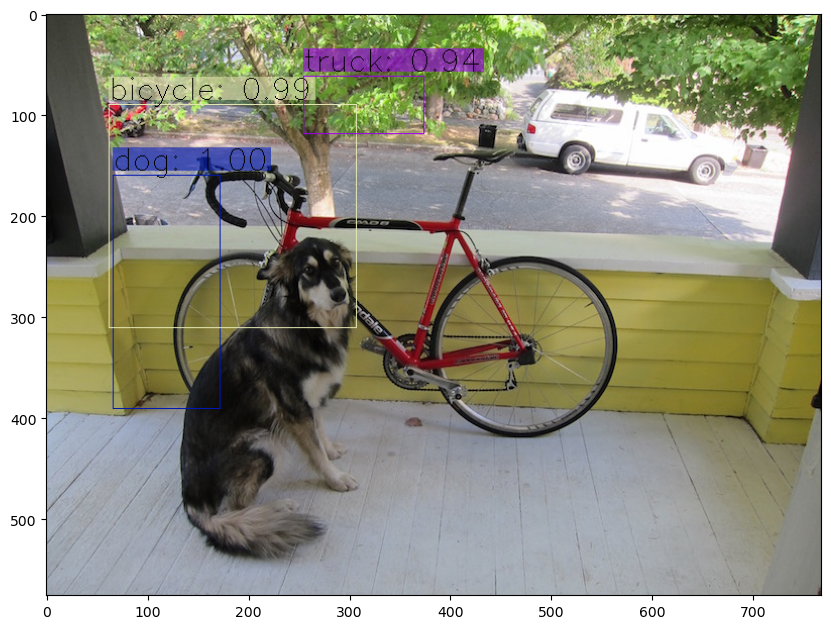

In [38]:
detection_recognition("/kaggle/input/data-for-yolo-v3-kernel/dog.jpg")